In [1]:
import pandas as pd
import numpy as np
import glob
from scipy import stats

In [2]:
print(pd.__version__)

1.4.1


In [3]:
carpeta="data/base_training_QQP_salida/"

In [4]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [5]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/base_training_QQP_salida/pTEST_new_0.2_9.csv.pickle'

In [6]:
df= pd.read_pickle(a[0])
df

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,ADJ}, women{woman,NOUN}, are{be,VER...","[NULL{null,ADJ}, women{woman,NOUN}, are{be,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.21101676, 0.011193112, 0.1477...","[0.9185215, 0.06824074, 0.013237788]","[0.0, 1.0, 0.0]",0,4527,entailment,neutral,NOUN \ NOUN ...,neutral_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, little{little,ADJ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0352...","[0.9351847, 0.05851766, 0.0062975874]","[1.0, 0.0, 0.0]",0,6710,entailment,entailment,...,entailment_entailment
2,2,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2037788, 0.01616...","[0.6714634, 0.25563037, 0.0729063]","[1.0, 0.0, 0.0]",0,5827,entailment,entailment,...,entailment_entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, bride{bride,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.14955975, 0.1720...","[0.098649584, 0.8959448, 0.0054056784]","[1.0, 0.0, 0.0]",0,4575,neutral,entailment,...,entailment_neutral
4,4,"[NULL{null,ADJ}, two{two,NUM}, children{child,...","[NULL{null,ADJ}, children{child,NOUN}, prankin...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17383246, 0.20987684, 0.05930...","[0.78748983, 0.17043222, 0.04207785]","[0.0, 1.0, 0.0]",0,5540,entailment,neutral,NOUN ...,neutral_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,2361,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, is{be,VERB}, walking{walk,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.016168319, 0.17623438, 0.0352...","[0.007338914, 0.3469826, 0.6456785]","[0.0, 0.0, 1.0]",1,9788,contradiction,contradiction,NOUN VERB ADP A...,contradiction_contradiction
2362,2362,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, i{i,PRON}, am{be,VERB}, wea...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17723154, 0.10602716, 0.12925...","[0.1607791, 0.4746334, 0.36458743]","[0.0, 1.0, 0.0]",1,9795,neutral,neutral,NOUN ...,neutral_neutral
2363,2363,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.17841...","[0.008103827, 0.03741662, 0.9544796]","[0.0, 0.0, 1.0]",1,9806,contradiction,contradiction,...,contradiction_contradiction
2364,2364,"[NULL{null,PROPN}, a{a,DET}, lady{lady,NOUN}, ...","[NULL{null,ADJ}, one{one,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.21101676, 0.1078...","[0.012027481, 0.16974303, 0.8182295]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction,NOUN...,contradiction_contradiction


In [7]:
df.Hipotesis[0]

['NULL{null,ADJ}',
 'women{woman,NOUN}',
 'are{be,VERB}',
 'visiting{visit,VERB}',
 '.{.,PUNCT}']

In [8]:
df.Text[0]

['NULL{null,ADJ}',
 'women{woman,NOUN}',
 'are{be,VERB}',
 'sitting{sit,VERB}',
 'around{around,ADP}',
 'a{a,DET}',
 'table{table,NOUN}',
 'at{at,ADP}',
 'a{a,DET}',
 'restaurant{restaurant,NOUN}',
 'chatting{chatting,NOUN}',
 '.{.,PUNCT}']

In [9]:
print(len(df.Hipotesis[0]))
print(len(df.Text[0]))

5
12


In [10]:
m=df.M_Align[0][1:11,1:10]

In [11]:
m

array([[5.51725721e+00, 7.56270345e-03, 6.62436664e-01, 2.25669481e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [7.56270345e-03, 3.77704911e-02, 3.92526388e-02, 3.40605667e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [2.53469348e-01, 1.18060559e-01, 1.39670753e+00, 6.63689971e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.49966076e-02, 8.11925251e-03, 2.85237521e-01, 4.47513498e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.03606731e-02, 1.33681595e-02, 6.37378246e-02, 7.95571040e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.33296180e-01, 1.67332739e-02, 1.06711483e+00, 2.33342517e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.0

In [12]:
import scipy.stats

In [13]:
c=np.corrcoef(m)

In [14]:
c

array([[1.        , 0.03066887, 0.15959766, 0.19881737, 0.11248674,
        0.29807185, 0.15694296, 0.11248674, 0.42769857, 0.43995998],
       [0.03066887, 1.        , 0.72375863, 0.66681456, 0.80122412,
        0.65875679, 0.67079924, 0.80122412, 0.62787328, 0.63411184],
       [0.15959766, 0.72375863, 1.        , 0.9905358 , 0.98920872,
        0.98751891, 0.99715268, 0.98920872, 0.95819721, 0.95539329],
       [0.19881737, 0.66681456, 0.9905358 , 1.        , 0.97797563,
        0.98593871, 0.99150431, 0.97797563, 0.96185014, 0.96004448],
       [0.11248674, 0.80122412, 0.98920872, 0.97797563, 1.        ,
        0.96114753, 0.97685984, 1.        , 0.92594405, 0.92509245],
       [0.29807185, 0.65875679, 0.98751891, 0.98593871, 0.96114753,
        1.        , 0.98939011, 0.96114753, 0.99030257, 0.98822255],
       [0.15694296, 0.67079924, 0.99715268, 0.99150431, 0.97685984,
        0.98939011, 1.        , 0.97685984, 0.95967077, 0.95569384],
       [0.11248674, 0.80122412, 0.9892087

In [15]:
import seaborn as sns

In [16]:
df.Hipotesis[0]

['NULL{null,ADJ}',
 'women{woman,NOUN}',
 'are{be,VERB}',
 'visiting{visit,VERB}',
 '.{.,PUNCT}']

In [17]:
df.Text[0]

['NULL{null,ADJ}',
 'women{woman,NOUN}',
 'are{be,VERB}',
 'sitting{sit,VERB}',
 'around{around,ADP}',
 'a{a,DET}',
 'table{table,NOUN}',
 'at{at,ADP}',
 'a{a,DET}',
 'restaurant{restaurant,NOUN}',
 'chatting{chatting,NOUN}',
 '.{.,PUNCT}']

<AxesSubplot:>

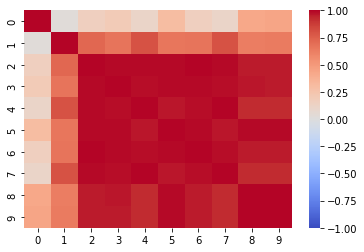

In [18]:
sns.heatmap(c,vmin=-1,vmax=1,cmap="coolwarm")

<AxesSubplot:>

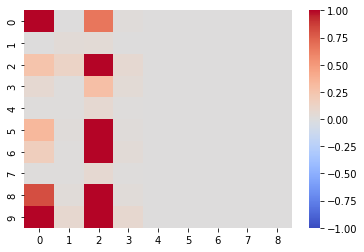

In [19]:
sns.heatmap(m,vmin=-1,vmax=1,cmap="coolwarm")

In [20]:
def normalize_2d(matrix,axis):
    norm = np.linalg.norm(matrix,axis=axis)
    if(axis==1):
        print(norm)
        matrix = matrix.T/norm  # normalized matrix
        return matrix.T
    else:
        matrix = matrix/norm  # normalized matrix
        return matrix

In [21]:
A=np.array([[1,2],[0,4],[5,6]]) 
B=np.array([[1,2,3],[3,4,5]])

In [22]:
np.dot(A,B)

array([[ 7, 10, 13],
       [12, 16, 20],
       [23, 34, 45]])

In [23]:
A

array([[1, 2],
       [0, 4],
       [5, 6]])

In [24]:
normalize_2d(A,1)

[2.23606798 4.         7.81024968]


array([[0.4472136 , 0.89442719],
       [0.        , 1.        ],
       [0.6401844 , 0.76822128]])

In [25]:
sas=pd.read_pickle(a[0])
sas

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label,ma_umbral,target_prediction
0,0,"[NULL{null,ADJ}, women{woman,NOUN}, are{be,VER...","[NULL{null,ADJ}, women{woman,NOUN}, are{be,VER...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.21101676, 0.011193112, 0.1477...","[0.9185215, 0.06824074, 0.013237788]","[0.0, 1.0, 0.0]",0,4527,entailment,neutral,NOUN \ NOUN ...,neutral_entailment
1,1,"[NULL{null,PROPN}, a{a,DET}, little{little,ADJ...","[NULL{null,PROPN}, a{a,DET}, girl{girl,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.17582855, 0.0352...","[0.9351847, 0.05851766, 0.0062975874]","[1.0, 0.0, 0.0]",0,6710,entailment,entailment,...,entailment_entailment
2,2,"[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[NULL{null,PROPN}, a{a,DET}, person{person,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.2037788, 0.01616...","[0.6714634, 0.25563037, 0.0729063]","[1.0, 0.0, 0.0]",0,5827,entailment,entailment,...,entailment_entailment
3,3,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, the{the,DET}, bride{bride,N...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.14955975, 0.1720...","[0.098649584, 0.8959448, 0.0054056784]","[1.0, 0.0, 0.0]",0,4575,neutral,entailment,...,entailment_neutral
4,4,"[NULL{null,ADJ}, two{two,NUM}, children{child,...","[NULL{null,ADJ}, children{child,NOUN}, prankin...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17383246, 0.20987684, 0.05930...","[0.78748983, 0.17043222, 0.04207785]","[0.0, 1.0, 0.0]",0,5540,entailment,neutral,NOUN ...,neutral_entailment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,2361,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,PROPN}, is{be,VERB}, walking{walk,V...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.016168319, 0.17623438, 0.0352...","[0.007338914, 0.3469826, 0.6456785]","[0.0, 0.0, 1.0]",1,9788,contradiction,contradiction,NOUN VERB ADP A...,contradiction_contradiction
2362,2362,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, i{i,PRON}, am{be,VERB}, wea...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17723154, 0.10602716, 0.12925...","[0.1607791, 0.4746334, 0.36458743]","[0.0, 1.0, 0.0]",1,9795,neutral,neutral,NOUN ...,neutral_neutral
2363,2363,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,ADJ}, two{two,NUM}, men{man,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.21513091, 0.17841...","[0.008103827, 0.03741662, 0.9544796]","[0.0, 0.0, 1.0]",1,9806,contradiction,contradiction,...,contradiction_contradiction
2364,2364,"[NULL{null,PROPN}, a{a,DET}, lady{lady,NOUN}, ...","[NULL{null,ADJ}, one{one,NUM}, women{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.103053674, 0.21101676, 0.1078...","[0.012027481, 0.16974303, 0.8182295]","[0.0, 0.0, 1.0]",1,9813,contradiction,contradiction,NOUN...,contradiction_contradiction


In [26]:
new_data = {'Docs' : [], 'grupo': [],'muestreo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'eigenvalues' : [],'eigenvectors' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
for e in a:
    df=pd.read_pickle(e)
    valores=[0,1]
    for i in valores:
        df_prediction=df[df["Paraphrase"]==i]
        for l1 in etiquetas:
            for l2 in etiquetas:
                new_data['Docs'].append(e)
                new_data['grupo'].append(float(e.split('_')[5])*100)
                new_data['muestreo'].append(e.split('_')[6])    
                subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
                total=df_prediction[df_prediction['gold_label']==l1].shape[0]
                new_data['Total'].append(total)
                new_data['Subtotal'].append(subtotal)
                new_data['E_P'].append(l1+"_"+l2)
                temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
                l_eigenvalues=[]
                l_eigenvectors=[]
                for index,strings in temp.iterrows():
                    m=strings[5][1:len(strings[1]),1:len(strings[2])]
                    m_norm=np.dot(stats.zscore(np.transpose(m),1),stats.zscore(m))
                    x, v = np.linalg.eig (m_norm)
                    l_eigenvalues.append(x)
                    l_eigenvectors.append(v)
                new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
                new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
                new_data['Paraphrase'].append(i)
                l_eigenvalues.clear()
                l_eigenvectors.clear()
dfn=pd.DataFrame(new_data)

/tmp/ipykernel_373180/2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvalues'].append(np.array(l_eigenvalues[:]))
/tmp/ipykernel_373180/2097832507.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_data['eigenvectors'].append(np.array(l_eigenvectors[:]))
/tmp/ipykernel_373180/2097832507.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [27]:
dfn.to_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [28]:
dfn=pd.read_pickle(carpeta+"eigen/eigenvaluesZSCORE.pickle")

In [29]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,373,332,entailment_entailment,"[[98.33011, 54.982506, 30.790632, 15.792153, 1...","[[[0.3065522, 0.005801864, 0.5321009, 0.074557...",0
1,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,373,31,entailment_neutral,"[[26.554186, 20.4233, 11.352584, 3.536986, 0.9...","[[[-0.41695318, -0.33802184, 0.41890147, 0.095...",0
2,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,373,10,entailment_contradiction,"[[31.499578, 3.6049538, 0.8597306, 0.030651601...","[[[-0.39795896, -0.41570237, 0.67174643, 0.069...",0
3,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,415,52,neutral_entailment,"[[25.748594, 11.577328, 4.1154385, 2.558637], ...","[[[-0.039792616, 0.95877445, -0.27086994, 0.07...",0
4,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,415,338,neutral_neutral,"[[40.54613, 14.739519, 10.99404, 5.7203083], [...","[[[0.46621865, 0.4597136, 0.7291545, 0.199091]...",0
...,...,...,...,...,...,...,...,...,...
2173,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,953,214,neutral_neutral,"[[26.09006, 21.702818, 5.001084, 7.2060432], [...","[[[-0.551719, -0.4622124, 0.6905038, 0.0719050...",1
2174,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,953,681,neutral_contradiction,"[[89.243706, 32.6968, 6.08089, 3.6675603, 0.89...","[[[0.44578424, 0.172819, 0.049906913, -0.03091...",1
2175,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,990,50,contradiction_entailment,"[[22.457054, 12.582642, 4.8422465, 0.093475915...","[[[-0.25041857, -0.6472919, -0.5175588, 0.4898...",1
2176,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,990,199,contradiction_neutral,"[[141.58298, 80.07159, 19.799242, 14.973242, 8...","[[[-0.26194873, -0.42997012, 0.01098803, -0.00...",1


In [30]:
ejemplo1=dfn.eigenvalues[0][0]
ejemplo2=dfn.eigenvalues[0][1]
ejemplo3=dfn.eigenvalues[0][2]

In [31]:
import matplotlib.pyplot as plt
import math

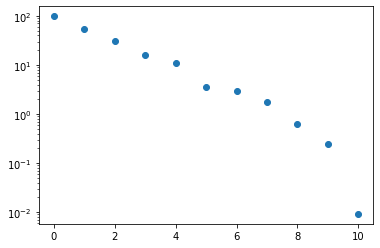

In [32]:
plt.scatter(x=np.arange(len(ejemplo1)),y=ejemplo1)
plt.yscale("log")

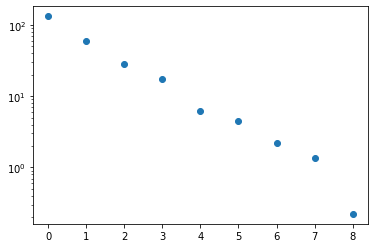

In [33]:
plt.scatter(x=np.arange(len(ejemplo2)),y=ejemplo2)
plt.yscale("log")

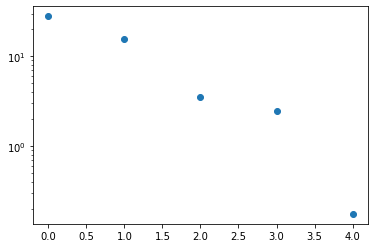

In [34]:
plt.scatter(x=np.arange(len(ejemplo3)),y=ejemplo3)
plt.yscale("log")

In [35]:
a=dfn.eigenvalues[0][4]

In [36]:
a

array([ 0.5209617,  1.7143164,  7.034812 , 10.72991  ], dtype=float32)

In [37]:
lista_eigenvalues=[]

In [38]:
dfn

,Docs,grupo,muestreo,Total,Subtotal,E_P,eigenvalues,eigenvectors,Paraphrase
0,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,373,332,entailment_entailment,"[[98.33011, 54.982506, 30.790632, 15.792153, 1...","[[[0.3065522, 0.005801864, 0.5321009, 0.074557...",0
1,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,373,31,entailment_neutral,"[[26.554186, 20.4233, 11.352584, 3.536986, 0.9...","[[[-0.41695318, -0.33802184, 0.41890147, 0.095...",0
2,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,373,10,entailment_contradiction,"[[31.499578, 3.6049538, 0.8597306, 0.030651601...","[[[-0.39795896, -0.41570237, 0.67174643, 0.069...",0
3,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,415,52,neutral_entailment,"[[25.748594, 11.577328, 4.1154385, 2.558637], ...","[[[-0.039792616, 0.95877445, -0.27086994, 0.07...",0
4,data/base_training_QQP_salida/pTEST_new_0.2_9....,20.0,9.csv.pickle,415,338,neutral_neutral,"[[40.54613, 14.739519, 10.99404, 5.7203083], [...","[[[0.46621865, 0.4597136, 0.7291545, 0.199091]...",0
...,...,...,...,...,...,...,...,...,...
2173,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,953,214,neutral_neutral,"[[26.09006, 21.702818, 5.001084, 7.2060432], [...","[[[-0.551719, -0.4622124, 0.6905038, 0.0719050...",1
2174,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,953,681,neutral_contradiction,"[[89.243706, 32.6968, 6.08089, 3.6675603, 0.89...","[[[0.44578424, 0.172819, 0.049906913, -0.03091...",1
2175,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,990,50,contradiction_entailment,"[[22.457054, 12.582642, 4.8422465, 0.093475915...","[[[-0.25041857, -0.6472919, -0.5175588, 0.4898...",1
2176,data/base_training_QQP_salida/pTEST_new_0.5_12...,50.0,12.csv.pickle,990,199,contradiction_neutral,"[[141.58298, 80.07159, 19.799242, 14.973242, 8...","[[[-0.26194873, -0.42997012, 0.01098803, -0.00...",1


In [39]:
grupos_box=dfn["grupo"].unique()

In [40]:
eti_box=dfn["E_P"].unique()

In [41]:
for gb in grupos_box:
    for et in eti_box:
        df=dfn[(dfn["grupo"]==gb) & (dfn["E_P"]==et)]
        lista_eigenvalues=[]
        for index,strings in df.iterrows():
            data=strings[6]
            #print(strings["E_P"],strings["grupo"])
            #print(data[0])
            #print(data[1:])
            for i in range(42):
                columna = [float(fila[i]) for fila in data if i < len(fila)]
                #print(columna)
                lista_eigenvalues.append(columna)
            fig2 = plt.figure(figsize=(20,10))
            ax.tick_params(labelsize=10)
            ax.grid(visible=True)
            plt.title("Boxplot eigenvalues "+et+" - "+str(gb),fontsize=30)
            bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")
            break
        

/tmp/ipykernel_373180/3931257323.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  columna = [float(fila[i]) for fila in data if i < len(fila)]


NameError: name 'ax' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
lista_eigenvalues

[[42.08087,
  62.523476,
  29.60789,
  44.297653,
  92.12063,
  60.607395,
  42.469032,
  119.341385,
  137.86183,
  68.32848,
  72.568115,
  128.8557,
  84.73515,
  60.307728,
  49.487907,
  60.370274,
  36.55351,
  59.729183,
  48.716484,
  53.24939,
  36.488422,
  68.51858,
  34.771606,
  50.36612,
  98.3021,
  50.033985,
  37.76495,
  55.927387,
  66.861534,
  50.58563,
  53.636627,
  131.54169,
  47.412663,
  21.719042,
  40.18985,
  110.28296,
  54.602135,
  39.211994,
  33.709576,
  54.28029,
  68.82015,
  (147.6407+0j),
  74.34464,
  19.12077,
  32.718174,
  94.89795,
  144.18393,
  73.00247,
  63.791763,
  63.51944,
  71.594406,
  65.40456,
  122.21037,
  113.71737,
  35.96813,
  54.093864,
  28.649836,
  67.51706,
  48.720364,
  149.0954,
  71.75541,
  30.414722,
  57.593525,
  64.0102,
  65.64974,
  78.51613,
  77.28594,
  35.65043,
  49.371784,
  91.58573,
  60.141727,
  26.179317,
  25.00515,
  41.824158,
  41.32215,
  104.77101,
  49.932194,
  30.596998,
  55.64651,
  (19

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.XTick at 0x7efd4478b760>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39'),
  Text(40, 0, '40'),
  Text(41, 0, '41')])

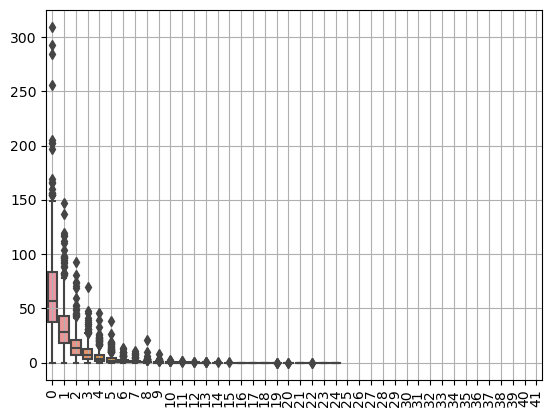

In [ ]:
sns.boxplot(data=lista_eigenvalues)
plt.grid()
plt.xticks(np.arange(42),rotation=90)

/home/david/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


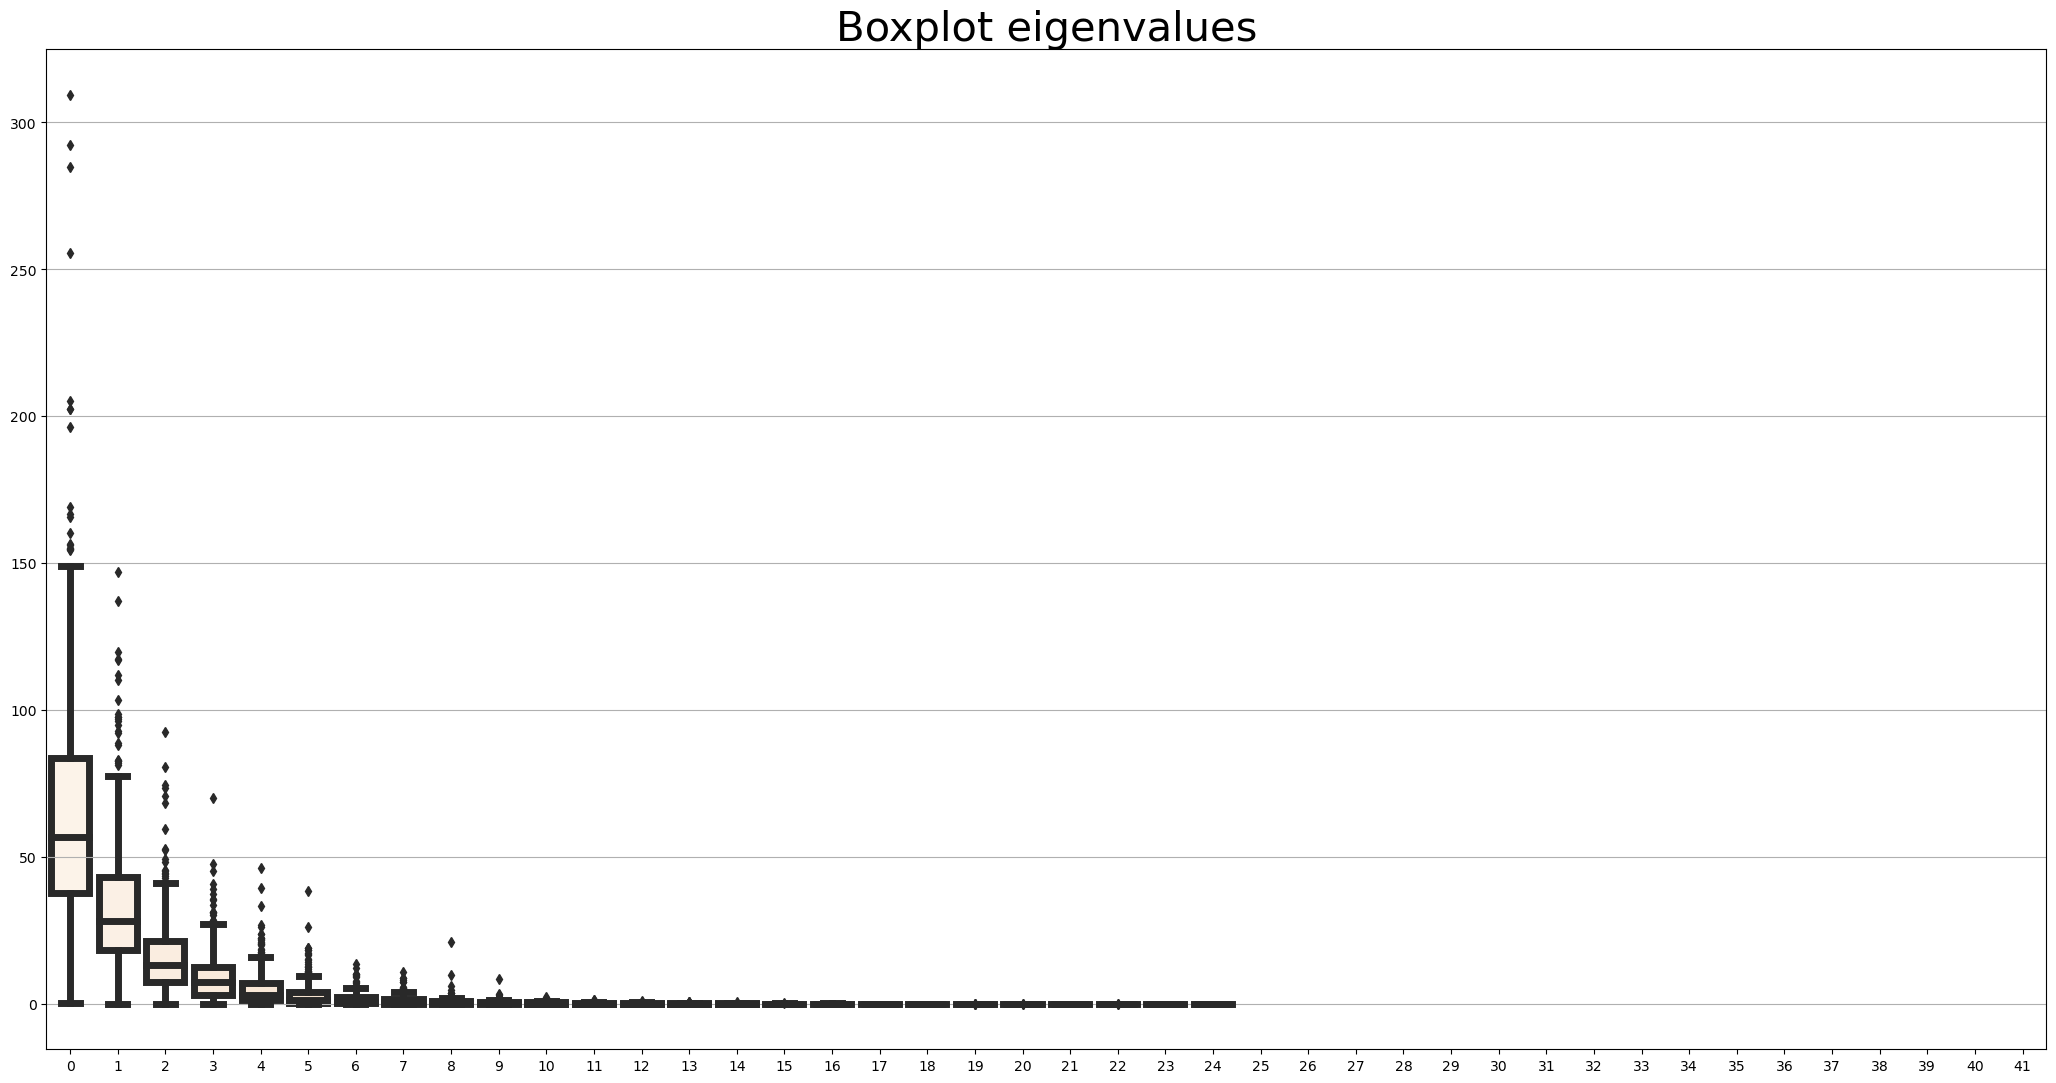

In [ ]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=10)
ax.grid(visible=True)
plt.title("Boxplot eigenvalues",fontsize=30)
bp0 = sns.boxplot(data=lista_eigenvalues,linewidth=5,palette="Oranges")

In [ ]:
s=np.transpose(m)*m

In [ ]:
m_n=normalize_2d(s)

In [ ]:
x, v = np.linalg.eig (m_n)

In [ ]:
x

array([ 8.2198036e-01,  4.4953737e-01,  3.3778334e-01,  9.0338141e-02,
        1.5342963e-03, -1.3962749e-03, -1.1090860e-03,  5.2070891e-04,
       -8.6099935e-05,  2.1168440e-04,  1.3158313e-04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00], dtype=float32)

In [ ]:
v

array([[-1.8347610e-03,  8.8550820e-04, -2.9179843e-03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.8047651e-02,  5.6653398e-01, -8.1549281e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.6764369e-01,  7.7380818e-01,  5.7283217e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  1.0000000e+00]], dtype=float32)

In [ ]:
len(v)

42